In [36]:
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.font_manager
import numpy as np 
import seaborn as sns
%matplotlib inline
from scipy import stats
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

In [9]:
dataset=pd.read_csv('ML_Project/player_playoffs_career.csv')

In [10]:
dataset.head()

,ilkid,firstname,lastname,leag,gp,minutes,pts,dreb,oreb,reb,...,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,ABDELAL01,Alaa,Abdelnaby,N,17,106,38,17,3,20,...,0,1,11,11,40,18,4,2,0,0
1,ABDULKA01,Kareem,Abdul-jabbar,N,237,8851,5762,833,355,2481,...,150,399,404,787,4422,2356,1419,1050,4,0
2,ABDULMA01,Mahmo,Abdul-rauf,N,15,415,195,18,5,23,...,7,1,22,37,187,69,45,43,49,14
3,ABDULTA01,Tariq,Abdul-wahad,N,13,178,68,24,17,41,...,4,4,4,14,63,24,24,20,3,0
4,ABERNTO01,Tom,Abernethy,N,13,226,68,0,0,42,...,0,0,0,18,54,22,29,24,0,0


In [11]:
dataset.describe()

,gp,minutes,pts,dreb,oreb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
count,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000
mean,28.067640,696.847202,300.644282,50.639903,22.579562,134.000000,65.148905,14.137713,9.575669,25.015572,73.121168,254.203406,114.175182,88.091484,65.850122,19.060341,6.443796
std,32.949118,1105.103268,549.992403,133.688180,59.718378,268.782014,137.851783,34.847267,31.567226,60.849414,102.457455,443.287398,208.375652,170.813998,128.282099,62.338299,22.160687
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,41.000000,17.000000,0.000000,0.000000,7.000000,3.000000,0.000000,0.000000,0.000000,8.000000,16.000000,6.000000,5.000000,3.000000,0.000000,0.000000
50%,16.000000,246.000000,87.000000,1.000000,0.000000,41.000000,16.000000,0.000000,0.000000,1.000000,32.000000,80.000000,33.000000,26.000000,18.000000,0.000000,0.000000
75%,38.000000,861.000000,335.500000,39.000000,18.000000,141.000000,69.500000,11.000000,6.000000,20.500000,97.000000,295.500000,128.000000,94.000000,69.000000,4.000000,1.000000
max,237.000000,8851.000000,5987.000000,1560.000000,741.000000,4104.000000,2346.000000,395.000000,472.000000,696.000000,787.000000,4497.000000,2356.000000,1995.000000,1463.000000,820.000000,320.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ilkid      2055 non-null   object 
 1   firstname  2055 non-null   object 
 2   lastname   2055 non-null   object 
 3   ppts       2055 non-null   float64
 4   pdreb      2055 non-null   float64
 5   poreb      2055 non-null   float64
 6   preb       2055 non-null   float64
 7   pasts      2055 non-null   float64
 8   pstl       2055 non-null   float64
 9   pblk       2055 non-null   float64
 10  pturnover  2055 non-null   float64
 11  ppf        2055 non-null   float64
 12  pfga       2055 non-null   float64
 13  pfgm       2055 non-null   float64
 14  pfta       2055 non-null   float64
 15  pftm       2055 non-null   float64
 16  ptpa       2055 non-null   float64
 17  ptpm       2055 non-null   float64
dtypes: float64(15), object(3)
memory usage: 289.1+ KB


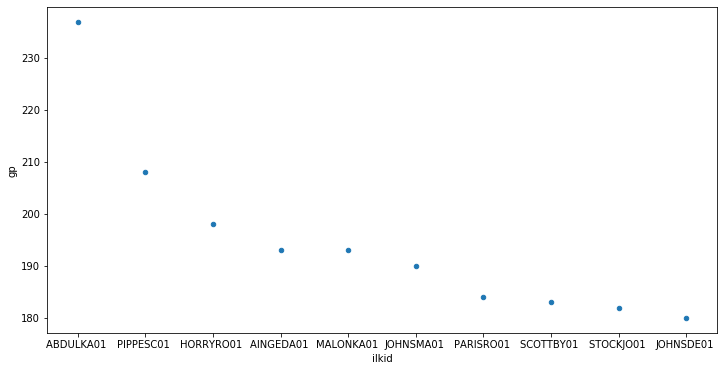

In [31]:

dataset.sort_values(by='gp', ascending=False).head(10)[['ilkid','gp']].plot.scatter(x='ilkid',y='gp',figsize=(12,6))

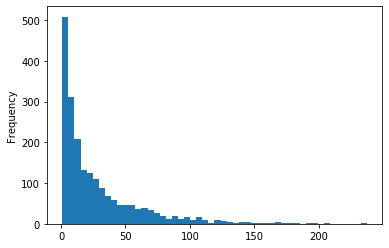

In [33]:
dataset['gp'].plot.hist(bins=50)

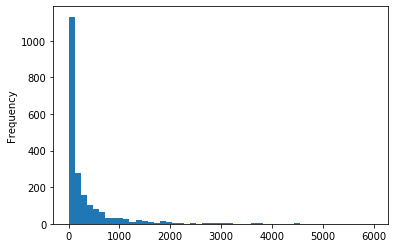

In [34]:
dataset['pts'].plot.hist(bins=50)

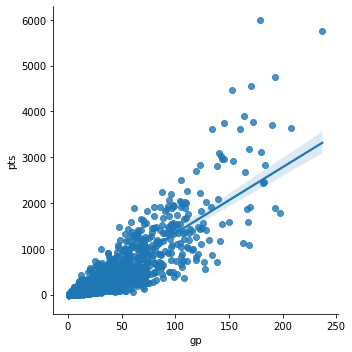

In [39]:
sns.lmplot(x='gp',y='pts', data=dataset)

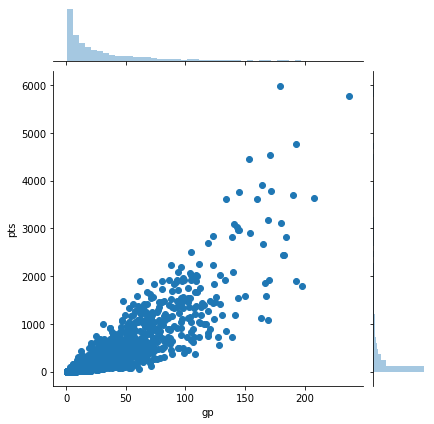

In [40]:
sns.jointplot(x='gp',y='pts', data=dataset)